# Basic Image Data Analysis Using Numpy and OpenCV – Part 1

In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Importing an Image

Let’s load an image.

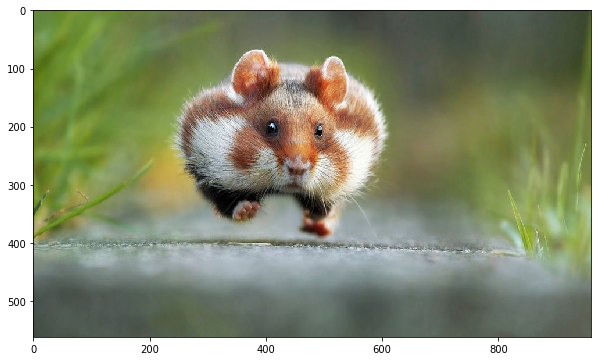

In [2]:
pic=imageio.imread('demo_2.jpg')
plt.figure( figsize= (10,10))

plt.imshow(pic)

## Access Basic Image Properties

In [3]:
print("Image:")
print('Type : ',type(pic))

print('Shape : {}'.format(pic.shape))
print('Height {}'.format(pic.shape[0]))
print('Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

print('Image size {}'.format(pic.size))

Image:
Type :  <class 'imageio.core.util.Array'>
Shape : (562, 960, 3)
Height 562
Width 960
Dimension of Image 3
Image size 1618560


Let's verify that the rgb values are in the \[0-255\] range.

In [4]:
print('Maximum RGB value {}'.format(pic.max()))
print('Minimum RGB value {}'.format(pic.min()))

Maximum RGB value 255
Minimum RGB value 0


We can see individual pixels by indexing the image just like any other array.

In [5]:
print('Pixel at (100,50): {}'.format(pic[ 100, 50]))

Pixel at (100,50): [109 143  46]


## Color Channels

We can access individual rgb values by adding a third index.

In [6]:
print('R value: {}'.format(pic[ 100, 50, 0]))

print('G value: {}'.format(pic[ 100, 50, 1]))

print('B value: {}'.format(pic[ 100, 50, 2]))

R value: 109
G value: 143
B value: 46


In this case: R = 109, G = 143, and B = 46. Thus, the pixel is mostly green.

**Note**: OpenCV assumes the image to be [BGR or BGRA](https://docs.opencv.org/trunk/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce) (BGR is the default OpenCV colour format).

Next, we'll visualize each color channel by displaying them one at a time. Since the new pixel values will be one-dimensional, we'll need to pass in a **color map** to matplotlib so that it knows how to color the image.

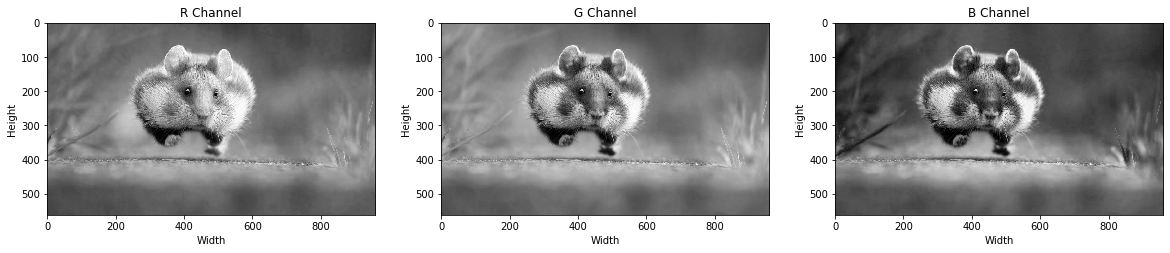

In [7]:
fig,ax = plt.subplots( nrows=1, ncols=3, figsize=(20,20) )

ax[0].set_title("R Channel")
ax[1].set_title("G Channel")
ax[2].set_title("B Channel")

for c,ax in zip(range(3),ax): 

    # passing each channel
    curr_channel = pic[:,:,c]
    
    ax.set_ylabel('Height')
    ax.set_xlabel('Width')

    # display each channel
    ax.imshow(curr_channel, cmap=plt.cm.gray)

## Change Pixel Values

Now that we understand how to access image data, let's modify it. Let's start by setting RGB values for each of the following rows to full intensity.

* R channel: Row 100 - 110
* G channel: Row 200 - 210
* B channel: Row 300 - 310

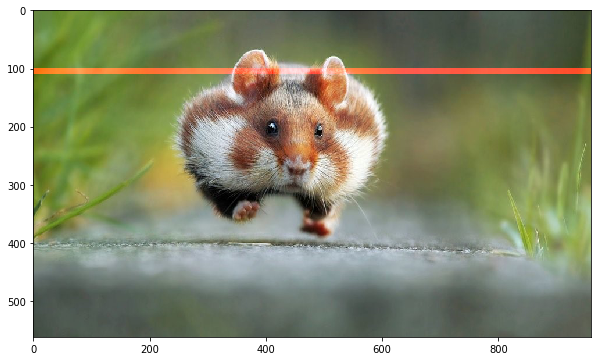

In [8]:
pic = imageio.imread('demo_2.jpg')
pic[100:110 , : , 0] =255


plt.figure( figsize= (10,10))
plt.imshow(pic)
plt.show()

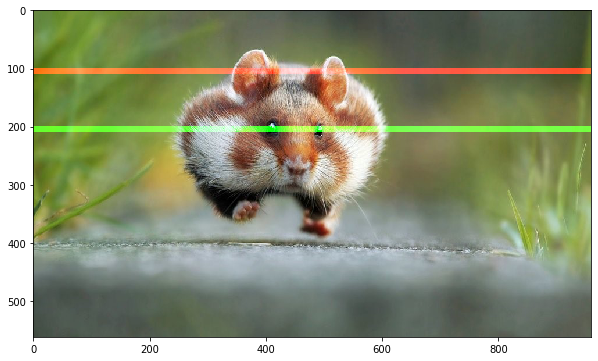

In [9]:
pic[200:210 , : , 1] = 255

plt.figure( figsize= (10,10) )

plt.imshow(pic)

plt.show()

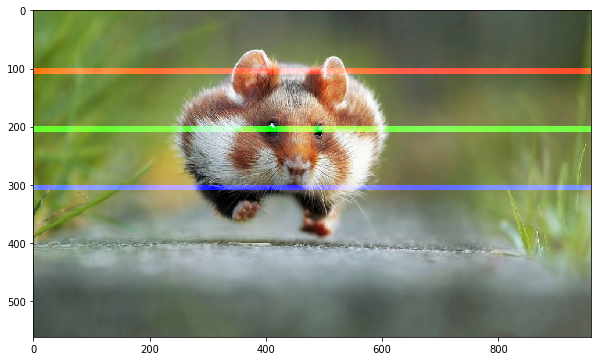

In [10]:
pic[300:310 , : , 2] =255

plt.figure( figsize= (10,10))
plt.imshow(pic)
plt.show()

Let's make one more change. We're going to make the pixels gray in columns 250-260, **except for ones within 50 pixels of the border**.

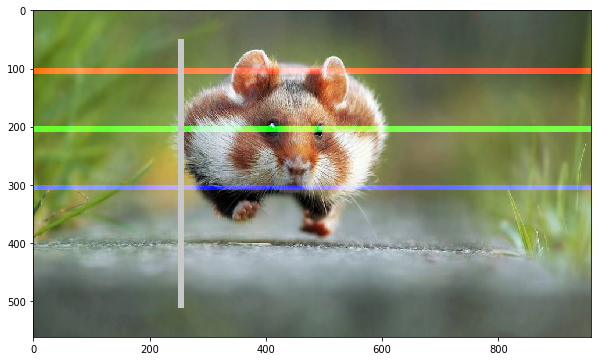

In [11]:
t_margin = 50
b_margin =  pic.shape[0] - 50

pic[ t_margin : b_margin , 250:260 , [0,1,2] ] = 200

plt.figure( figsize= (10,10))

plt.imshow(pic)

plt.show()

## Colorize Images

We can **colorize** an image by setting all but one channel to 0 for every pixel.

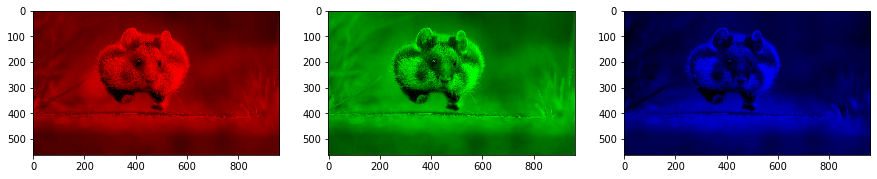

In [12]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))

for c,ax in zip( range(3), ax ): 
    
    color_img = imageio.imread('demo_2.jpg')
    
    for channel in range(3):
        if channel != c:
            color_img[ 0:pic.shape[0], 0:pic.shape[1], channel ] = 0
    
    ax.imshow(color_img)

## Grayscale

While looking at individual channels, we saw how to tell matplotlib to render each channel in grayscale. But how do we do this with multiple channels?

There are a couple of ways to do this in python ([examples](https://stackoverflow.com/a/45338831/9215780)). A simple choice is to iterate through each pixel and use a weighted mean of its RGB value.

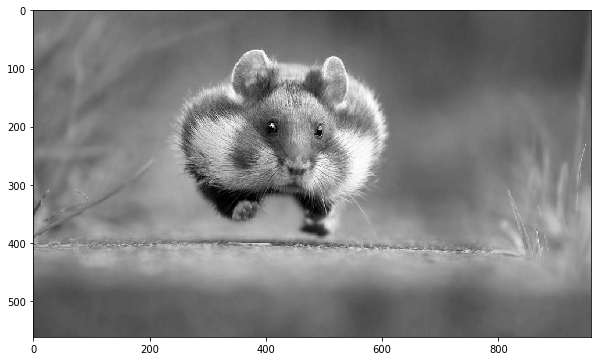

In [13]:
#Y' = 0.299 R + 0.587 G + 0.114 B
pic=imageio.imread('demo_2.jpg') 

gray_pic = [np.dot( pixel[..., :3], [0.299,0.587,0.114])
               for pixel in pic]

plt.figure(figsize=(10,10))
plt.imshow(gray_pic,cmap=plt.get_cmap(name='gray'))
plt.show()

[GIMP](https://docs.gimp.org/2.6/en/gimp-tool-desaturate.html) has three algorithms for creating grayscale images.

**Lightness** The graylevel will be calculated as
$$ \text{Lightness} = \frac{1}{2} (\max(R,G,B) + \min(R,G,B)) $$

**Luminosity** The gray level will be calculated as 
$$ \text{Luminosity} = 0.21 R + 0.72 G + 0.07 B$$

**Average** The gray level will be calculated as
$$\text{Average Brightness} = \frac{1}{3}(R + G + B)$$

Let's implement the luminosity algorithm.

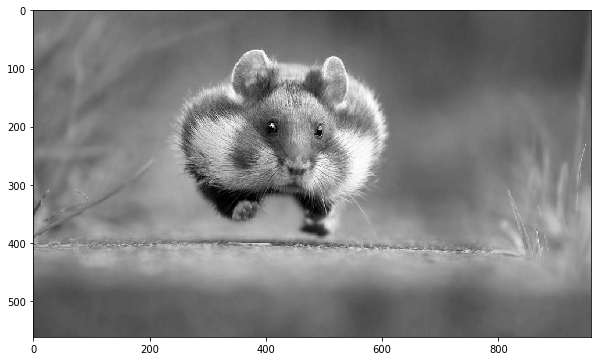

In [14]:
pic=imageio.imread('demo_2.jpg')

gray_pic = [np.dot( pixel[..., :3], [0.299,0.587,0.114])
               for pixel in pic]

plt.figure(figsize=(10,10))

plt.imshow(gray_pic,cmap=plt.get_cmap(name='gray'))

plt.show()

Finally, let's look at an overview of the properties of the changed image.

In [16]:
gray_pic = np.array( gray_pic )

print('Type of the image : ',type(gray_pic))

print() 

print('Shape of the image : {}'.format(gray_pic.shape))

print('Image Hight {}'.format(gray_pic.shape[0]))

print('Image Width {}'.format(gray_pic.shape[1]))

print('Dimension of Image {}'.format(gray_pic.ndim))

print() 

print('Image size {}'.format(gray_pic.size))

print('Maximum RGB value in this image {}'.format(gray_pic.max()))

print('Minimum RGB value in this image {}'.format(gray_pic.min()))

print('Random indexes [X,Y] : {}'.format(gray_pic[100,50]))

Type of the image :  <class 'numpy.ndarray'>

Shape of the image : (562, 960)
Image Hight 562
Image Width 960
Dimension of Image 2

Image size 539520
Maximum RGB value in this image 255.0
Minimum RGB value in this image 0.0
Random indexes [X,Y] : 121.77599999999998


Notice that the dimension of the image is reduced, since we no longer have any RGB channels.